In [1]:
# If you haven't installed the bwb package yet, run the following command
# !pip install git+https://github.com/ottomossei/bwb
import warnings
warnings.simplefilter('ignore')

## import modules

In [2]:
import datetime
from bwb.db import LocalDB
import bwb.basicstrategy as bst
import bwb.indicator as indicator

Loading BokehJS ...

## Load candlestick

In [3]:
issue = 'AAPL'
d = LocalDB()
candle = d.loader(issue, start = '2020/01/01', end = datetime.date.today())
candle

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: Invalid input - start date cannot be after end date. startDate = 1629730800, endDate = 1622214000


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.096443,135480400.0
2020-01-03,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.376083,146322800.0
2020-01-06,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.960770,118387200.0
2020-01-07,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.612930,108872000.0
2020-01-08,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.797081,132079200.0
...,...,...,...,...,...,...,...
2021-05-24,2021-05-24,126.010002,127.940002,125.940002,127.099998,126.909851,63092900.0
2021-05-25,2021-05-25,127.820000,128.320007,126.320000,126.900002,126.710159,72009500.0
2021-05-26,2021-05-26,126.959999,127.389999,126.419998,126.849998,126.660225,56575900.0


## Select basic strategy

In [4]:
# MACD Cross Strategy
strategy = bst.MACDCross


## Select parameters of indicator

In [5]:
print(strategy.base_indicator_params())
indicator_params = {'n1': 12, 'n2': 26, 'ns': 9}

{'n1': array([ 6, 12, 18]), 'n2': array([13, 26, 39]), 'ns': array([ 5,  9, 15])}


## Set parameter and candle

In [6]:
strategy.candle = candle
strategy.indicator_params = indicator_params

## backtest

In [7]:
output = d.runsaver(strategy, candle, issue)

## Show with mplfinance

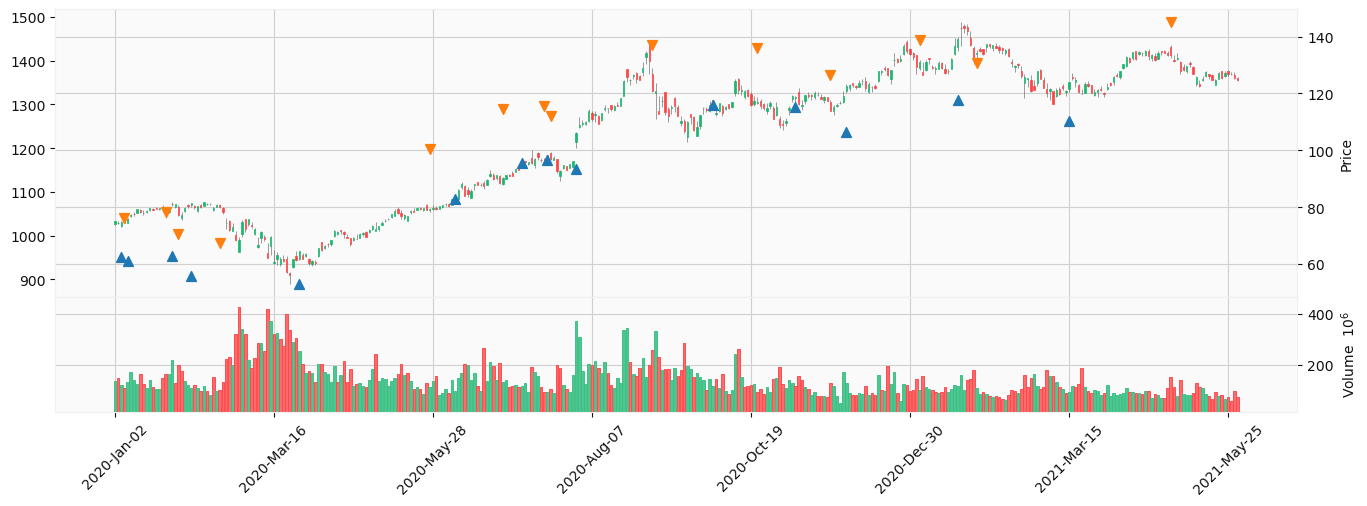

In [8]:
import mplfinance as mpf
import pandas as pd
buy = pd.DataFrame(data = output['_equity_curve']['Equity'][output['_trades']['EntryBar']]*0.95, index=output['_equity_curve'].index)
sell = pd.DataFrame(data = output['_equity_curve']['Equity'][output['_trades']['ExitBar']]*1.05, index=output['_equity_curve'].index)
# Show with Jupyter Notebook
apds = [mpf.make_addplot(buy,type='scatter',markersize=50,marker='^'),
        mpf.make_addplot(sell,type='scatter',markersize=50,marker='v')]

mpf.plot(candle, type='candle', figratio=(12,4),
         volume=True, style='yahoo', addplot=apds)